# Prueba CNN normal

Librerias


In [3]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

In [5]:
#datos

dataset= pd.read_csv('/content/dataset_5man_5girl_20repGesto_512dim.csv')
dataset

,pdid,time,ch1,ch2,ch3,ch4,ch5,ch6,tag,ID;;;;;;;;;;
0,0,0,0.633826,0.591990,0.512991,0.968018,0.223058,0.950284,0.0,1;;;;;;;;;;
1,1,4,0.649024,0.639468,0.501742,0.583785,0.333358,0.444996,0.0,1;;;;;;;;;;
2,2,8,0.647639,0.651658,0.459478,0.287560,0.911474,0.165396,0.0,1;;;;;;;;;;
3,3,12,0.640552,0.619407,0.472027,0.576660,0.899768,0.513566,0.0,1;;;;;;;;;;
4,4,16,0.625848,0.580593,0.514235,0.941218,0.310728,0.938194,0.0,1;;;;;;;;;;
...,...,...,...,...,...,...,...,...,...,...
14818,14818,1928,0.469921,0.398766,0.436147,0.779102,0.506128,0.860225,0.0,1;;;;;;;;;;
14819,14819,1932,0.476980,0.398863,0.439068,0.850154,0.285862,0.756351,0.0,1;;;;;;;;;;
14820,14820,1936,0.503081,0.421923,0.378526,0.405502,0.706085,0.170505,0.0,1;;;;;;;;;;
14821,14821,1940,0.496871,0.405830,0.378013,0.334184,0.900340,0.245167,0.0,1;;;;;;;;;;


In [6]:
#obtener valores que quiero
dataset.iloc[:404883,2:8].values #todos los valores en filas, los valores de ch1 - ch6

#guardarlos en variable
#data_x = dataset.iloc[:404883,2:8].values

#para prueba datos de 10
data_x = dataset.iloc[:10,2:8].values
data_x = np.array(data_x, dtype=np.float32) #comvertirlos en arreglos para que sea compatible con tensoflow


#para prueba datos de 10
data_y = dataset.iloc[:10,2].values
data_y = np.array(data_y, dtype=np.float32)
data_y

array([0.6338259 , 0.6490237 , 0.64763933, 0.64055216, 0.6258478 ,
       0.63001734, 0.6545212 , 0.64845407, 0.6531733 , 0.6278945 ],
      dtype=float32)

Estructura Red Neuronal


In [7]:
#Estructura de red neuronal de forma secuencial
model = Sequential()

model.add(Dense(12, activation="relu", input_dim=6 ))

#capa oculta
model.add(Dense(4, activation="relu"))

#capa salida
model.add(Dense(1,activation="sigmoid"))

In [8]:
model.compile(
    loss="binary_crossentropy",
    optimizer ='adam',
    metrics=['accuracy']
)


historial = model.fit(data_x, data_y, batch_size=20, epochs=500)

Epoch 1/500
1/1 [==============================] - 3s 3s/step - loss: 0.6553 - accuracy: 0.0000e+00
Epoch 2/500
1/1 [==============================] - 0s 11ms/step - loss: 0.6550 - accuracy: 0.0000e+00
Epoch 3/500
1/1 [==============================] - 0s 10ms/step - loss: 0.6547 - accuracy: 0.0000e+00
Epoch 4/500
1/1 [==============================] - 0s 10ms/step - loss: 0.6545 - accuracy: 0.0000e+00
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 0.6542 - accuracy: 0.0000e+00
Epoch 6/500
1/1 [==============================] - 0s 10ms/step - loss: 0.6540 - accuracy: 0.0000e+00
Epoch 7/500
1/1 [==============================] - 0s 10ms/step - loss: 0.6538 - accuracy: 0.0000e+00
Epoch 8/500
1/1 [==============================] - 0s 11ms/step - loss: 0.6537 - accuracy: 0.0000e+00
Epoch 9/500
1/1 [==============================] - 0s 8ms/step - loss: 0.6535 - accuracy: 0.0000e+00
Epoch 10/500
1/1 [==============================] - 0s 10ms/step - loss: 0.6534 - acc

Grafico matplot

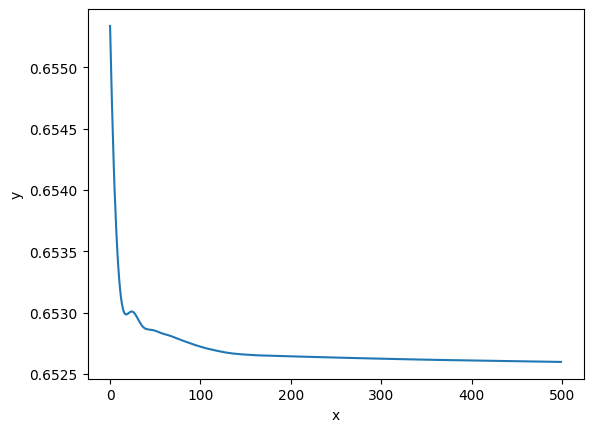

In [9]:
import matplotlib.pyplot as plt
plt.xlabel("x")
plt.ylabel("y")

plt.plot(historial.history['loss'])

# Prueba de con datos .mat

In [13]:
#importar datos del archivo .mat
from scipy.io import loadmat
data = loadmat('Event_1.mat')

# Muestra las claves del diccionario
print("Claves del diccionario en el archivo .mat:")
print(data.keys())

# Accede a los datos de una variable específica
var = 'eeg_processed' #variable a utilizar
if var in data:
    datos = data[var]
    print(f"\nDatos de la variable '{var}':")
    print(datos)
else:
    print(f"\nDatos de la variable '{var}':")
    print(f"\nLa variable '{var}' no está en el archivo.")

Claves del diccionario en el archivo .mat:
dict_keys(['__header__', '__version__', '__globals__', 'eeg_processed'])

Datos de la variable 'eeg_processed':
[[-0.7265575  -0.65101729 -1.         ... -0.50346511 -0.32013615
  -0.59905516]
 [-0.67816966 -0.5985542  -0.56414983 ... -0.28778956 -0.09780727
  -0.67023779]
 [-0.64119087 -0.58064911 -0.16354134 ...  0.06860901  0.20599897
  -0.55113152]
 ...
 [-0.14065726  0.2359265   0.81640086 ...  0.27196593  0.39501937
   0.85777496]
 [-0.1461181   0.22426275  0.60313194 ...  0.45532535  0.5060532
   0.9429678 ]
 [-0.32565557  0.05800861 -0.18401914 ...  0.34971831  0.15307825
   0.95560016]]


In [14]:
#prueba utilizando los 10 primeros datos
d_utilizar =  datos[:10]
#print(d_utilizar)

In [19]:
#datos
#dataset= pd.read_csv('./dataset/dataset_5man_5girl_20repGesto_512dim.csv')

#obtener valores que quiero de CH1
dataset.iloc[:10,2:8].values #todos los valores en filas, los valores de ch1 - ch6

#X
data_x = d_utilizar
#print(data_x)

#Y
data_y = dataset.iloc[:10,2].values
data_y = np.array(data_y, dtype=np.float32)
#print(data_y)


RED

In [20]:
#se va a utilizar en esta prueba modelo secuencial

#Estructura de red neuronal de forma secuencial
model = Sequential()

#input
model.add(Dense(12, activation="relu", input_dim=16))

#capa oculta
model.add(Dense(4, activation="relu"))

#capa salida
model.add(Dense(1,activation="sigmoid"))

model.compile(
    loss="binary_crossentropy",
    optimizer ='adam',
    metrics=['accuracy']
)

historial = model.fit(data_x, data_y, batch_size=20, epochs=400)

Epoch 1/400
1/1 [==============================] - 1s 1s/step - loss: 0.6639 - accuracy: 0.0000e+00
Epoch 2/400
1/1 [==============================] - 0s 13ms/step - loss: 0.6626 - accuracy: 0.0000e+00
Epoch 3/400
1/1 [==============================] - 0s 12ms/step - loss: 0.6614 - accuracy: 0.0000e+00
Epoch 4/400
1/1 [==============================] - 0s 11ms/step - loss: 0.6603 - accuracy: 0.0000e+00
Epoch 5/400
1/1 [==============================] - 0s 11ms/step - loss: 0.6594 - accuracy: 0.0000e+00
Epoch 6/400
1/1 [==============================] - 0s 12ms/step - loss: 0.6587 - accuracy: 0.0000e+00
Epoch 7/400
1/1 [==============================] - 0s 12ms/step - loss: 0.6581 - accuracy: 0.0000e+00
Epoch 8/400
1/1 [==============================] - 0s 14ms/step - loss: 0.6577 - accuracy: 0.0000e+00
Epoch 9/400
1/1 [==============================] - 0s 10ms/step - loss: 0.6573 - accuracy: 0.0000e+00
Epoch 10/400
1/1 [==============================] - 0s 12ms/step - loss: 0.6571 - ac

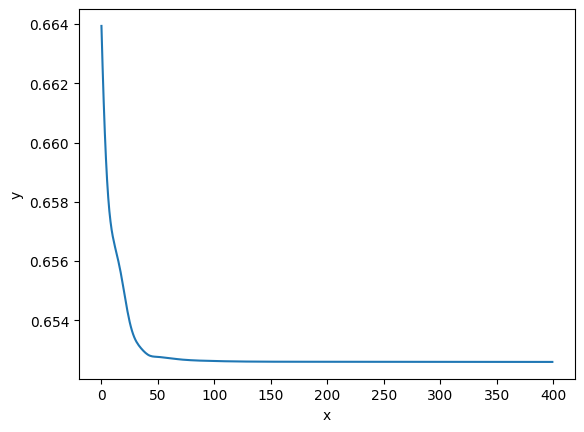

In [21]:
import matplotlib.pyplot as plt
plt.xlabel("x")
plt.ylabel("y")

plt.plot(historial.history['loss'])

In [24]:
#predictions
model.evaluate(data_x, data_y)
predcit_y = model.predict(data_x)
predcit_y

results = pd.DataFrame(np.round(predcit_y),columns=["Predict"])
results

results['Real'] = pd.Series(predcit_y[:, 0])
results


1/1 [==============================] - 0s 32ms/step


,Predict,Real
0,1.0,0.633731
1,1.0,0.649453
2,1.0,0.647140
3,1.0,0.635700
4,1.0,0.628648
5,1.0,0.633208
6,1.0,0.650210
7,1.0,0.658153
8,1.0,0.646438
9,1.0,0.627936
